# CIA 3 B - Project work on Deep Learning Technique 

### Submitted by: Divya Mary Biji, 22122020, 3MS DS A

Importing the necessary libraries

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

# TensorFlow Version
print("TensorFlow version:", tf.__version__)

In [5]:
# Image Directory Paths (Update these paths)
train_dir = "C:/Users/divya/Fire detection using CNN/Training and Validation"

test_dir = "C:/Users/divya/Fire detection using CNN/Testing"

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


# Flow from Directory
train_dataset = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
test_dataset = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')


Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [9]:
#classes
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

In [10]:
# Model Architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
r = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Model Evaluation
predictions = model.predict(test_dataset)
predictions = np.round(predictions)


Epoch 1/10
58/58 [==============================] - 55s 924ms/step - loss: 0.1552 - accuracy: 0.9536 - val_loss: 0.2233 - val_accuracy: 0.8824
Epoch 2/10
58/58 [==============================] - 49s 841ms/step - loss: 0.0961 - accuracy: 0.9716 - val_loss: 0.1280 - val_accuracy: 0.9559
Epoch 3/10
58/58 [==============================] - 51s 875ms/step - loss: 0.1184 - accuracy: 0.9711 - val_loss: 0.2815 - val_accuracy: 0.8382
Epoch 4/10
58/58 [==============================] - 50s 865ms/step - loss: 0.0820 - accuracy: 0.9727 - val_loss: 0.0903 - val_accuracy: 0.9559
Epoch 5/10
58/58 [==============================] - 60s 1s/step - loss: 0.0516 - accuracy: 0.9831 - val_loss: 0.0585 - val_accuracy: 0.9706
Epoch 6/10
58/58 [==============================] - 55s 952ms/step - loss: 0.0494 - accuracy: 0.9814 - val_loss: 0.2402 - val_accuracy: 0.9118
Epoch 7/10
58/58 [==============================] - 56s 963ms/step - loss: 0.0445 - accuracy: 0.9842 - val_loss: 0.0618 - val_accuracy: 0.9706
Ep

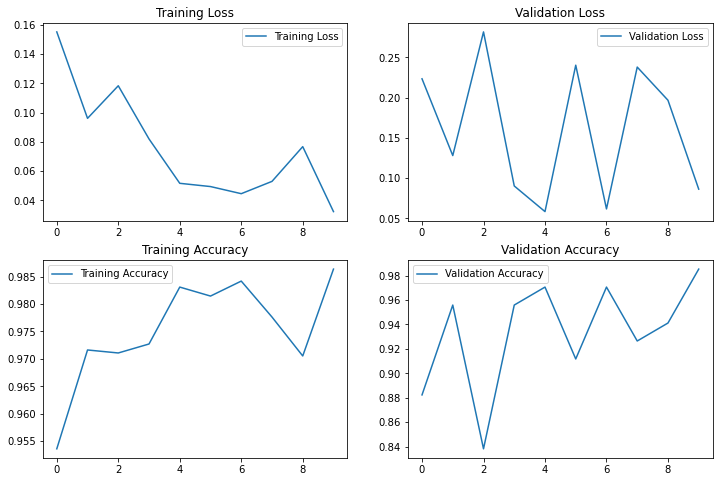

Number of predictions: 68


In [17]:
# Plotting Loss and Accuracy for Each Epoch
plt.figure(figsize=(12, 8))

# Plot Loss for each epoch
plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Validation Loss')
plt.legend()

# Plot Accuracy for each epoch
plt.subplot(2, 2, 3)
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()

# Prediction Comparison
print("Number of predictions:", len(predictions))


1/1 [==============================] - 0s 121ms/step


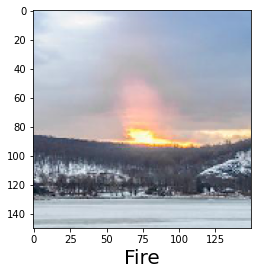

In [3]:
#Predict image function to input images and do predictions
from tensorflow.keras.preprocessing import image

def predictImage(model, filename):
    # Load the image
    img = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img)
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand the dimensions and normalize
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Make the prediction
    prediction = model.predict(img_array)
    
    # Display the result
    if prediction[0] > 0.5:
        plt.xlabel("No Fire", fontsize=20)
    else:
        plt.xlabel("Fire", fontsize=20)
    
    plt.show()


image_path = "C:/Users/divya/Fire detection using CNN/Testing/fire/abc184.jpg"

predictImage(model, image_path)


1/1 [==============================] - 0s 26ms/step


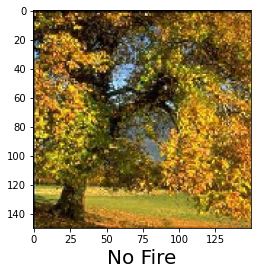

In [4]:
image_path_1 = "C:/Users/divya/Fire detection using CNN/Training and Validation/nofire/abc230.jpg"
predictImage(model, image_path_1)
